In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Load Data From CSV File
df = pd.read_csv('AnimeList.csv')
cols_id = list(df.columns)

# Clean some anime episodes that havent been updated. From personal experience, animes that are Hentai genre,
# Ova, Movie, Special anime type mainly have only 1 episode
df.loc[(df["genre"]=="Hentai") & (df["episodes"]==0),"episodes"] = 1
df.loc[(df["type"]=="OVA") & (df["episodes"]==0),"episodes"] = 1
df.loc[(df["type"] == "Movie") & (df["episodes"]==0), "episodes"] = 1
df.loc[(df["type"] == "Special") & (df["episodes"]==0), "episodes"] = 1

# Adjust NaN values
for col in cols_id:
    try:
        float(df_filtered[col][0])
        df[col].fillna(df[col].median(),inplace = True)
    except:
        df[col].fillna(0, inplace = True)
df.head()

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
# Check number of individual values in each column
cols_id = list(df.columns)
counts = []
for col in cols_id:
    a = len(df[col].value_counts())
    counts.append(a)
    print(a, col)
    print("==============================================================================")

14477 title
5607 title_english
13702 title_japanese
8576 title_synonyms
14383 image_url
7 type
16 source
196 episodes
3 status
2 airing
10026 aired_string
9649 aired
301 duration
7 rating
630 score
5908 scored_by
10640 rank
11759 popularity
7810 members
1229 favorites
1039 background
222 premiered
442 broadcast
9420 related
3222 producer
194 licensor
779 studio
4545 genre
4328 opening_theme
5458 ending_theme


In [4]:
distinct = {'count': counts, 'attribute': cols_id}
df_dis = pd.DataFrame(data=distinct)
df_dis.set_index("attribute", inplace = True)
df_dis

,count
attribute,
title,14477
title_english,5607
title_japanese,13702
title_synonyms,8576
image_url,14383
type,7
source,16
episodes,196
status,3


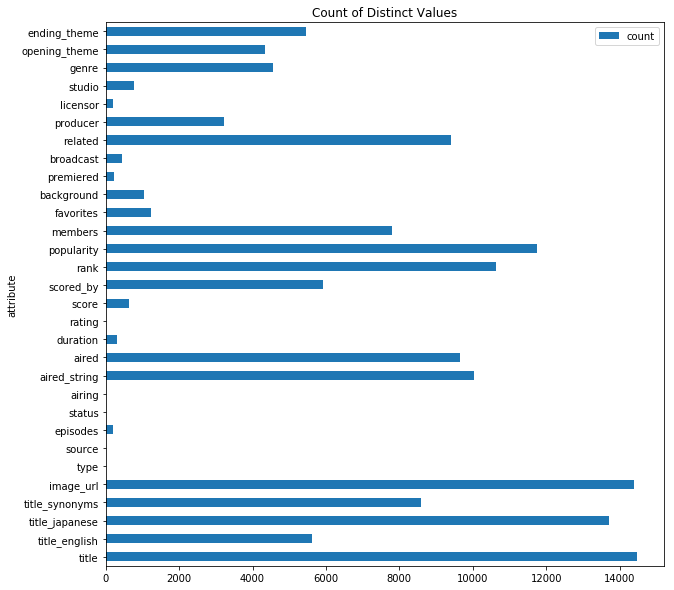

<Figure size 14400x7200 with 0 Axes>

In [5]:
df_dis.plot(kind = "barh", figsize = (10,10))
plt.title('Count of Distinct Values')
plt.figure(figsize=(200,100))
plt.show()

In [8]:
df_filtered = df
new = pd.DataFrame(df_filtered.groupby("type").size())
new.columns = ['count']
new = new.sort_values(by = "count")
print(new)
a = new.index.tolist()
a

         count
type          
Unknown     30
Music      849
ONA       1144
Special   1948
Movie     2624
OVA       3612
TV        4271


['Unknown', 'Music', 'ONA', 'Special', 'Movie', 'OVA', 'TV']

In [9]:
first_filtered = {}
for col in cols_id:
    if len(df_filtered[col].value_counts()) < 50:
        new = pd.DataFrame(df_filtered.groupby(col).size())
        new.columns = ['count']
        new = new.sort_values(by = "count")
        a = new.index.tolist()
        converted = {}
        new_id = []
        old_i = {}
        start = 0
        for i in new.values:
            i = int(i)
            if i not in list(old_i.keys()):
                new_id.append(start)
                old_i[i] = start
                converted[a[start]] = start
                start += 1
            else:
                new_id.append(old_i[i])
        print(col)
        print(converted)
        first_filtered[col] = converted
        print("=======================")
        new["new_id"] = new_id
        df_filtered[col] = df_filtered[col].replace(new.index,new.new_id)
print("All converted attributes: ")
print(first_filtered)
df_filtered

type
{'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}
source
{'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}
status
{'Not yet aired': 0, 'Currently Airing': 1, 'Finished Airing': 2}
airing
{True: 0, False: 1}
rating
{'None': 0, 'R+ - Mild Nudity': 1, 'R - 17+ (violence & profanity)': 2, 'Rx - Hentai': 3, 'PG - Children': 4, 'G - All Ages': 5, 'PG-13 - Teens 13 or older': 6}
All converted attributes: 
{'type': {'Unknown': 0, 'Music': 1, 'ONA': 2, 'Special': 3, 'Movie': 4, 'OVA': 5, 'TV': 6}, 'source': {'Radio': 0, 'Digital manga': 1, 'Card game': 2, 'Book': 3, 'Picture book': 4, 'Web manga': 5, '4-koma manga': 6, 'Music': 7, 'Novel': 8, 'Other': 9, 'Light novel': 10, 'Game': 11, 'Visual novel': 12, 'Manga': 13, 'Original': 14, 'Unknown': 15}, 'status': {'Not ye

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,0,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,0,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,0,Fall 2009,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",0,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S..."
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,0,Spring 2003,Tuesdays at 22:00 (JST),"{'Adaptation': [{'mal_id': 956, 'type': 'manga...","WAO World, Studio Jack","Discotek Media, Geneon Entertainment USA",Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']"
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,0,Fall 2007,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 3074, 'type': 'mang...","Geneon Universal Entertainment, ASCII Media Works",Funimation,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '..."
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,0,Fall 2008,Fridays at 00:45 (JST),"{'Adaptation': [{'mal_id': 419, 'type': 'manga...","Fuji TV, Asmik Ace Entertainment, Sony Music E...",0,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The

In [13]:
labels = ["None", "R+ - Mild Nudity", "R - 17+ (violence & profanity)", 'Rx - Hentai', 'PG - Children', 'G - All Ages', 'PG-13 - Teens 13 or older']
df_rating = df_filtered[["title", "rating"]]
df_rating = pd.DataFrame(df_rating.groupby('rating')['title'].nunique())
df_rating["label"] = labels

In [14]:
df_rating.set_index("label", inplace = True)
df_rating

,title
label,
None,544
R+ - Mild Nudity,878
R - 17+ (violence & profanity),997
Rx - Hentai,1219
PG - Children,1279
G - All Ages,4541
PG-13 - Teens 13 or older,5020


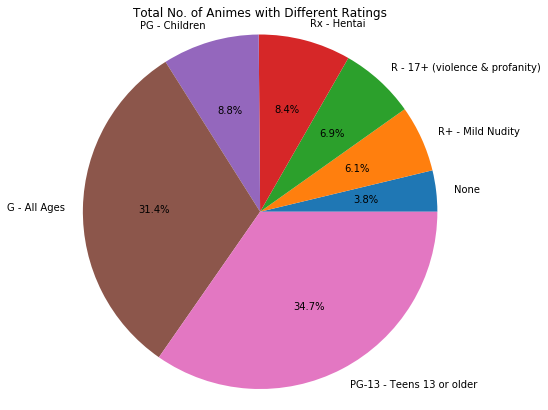

In [15]:
rating = df_rating["title"]
rating.plot(kind='pie',
                figsize=(7, 7),
                autopct="%1.1f%%"
             )
plt.title("Total No. of Animes with Different Ratings")
plt.ylabel("")
plt.axis('equal')

plt.show()



In [10]:
# Convert Premiered Column to Year column and Season Column
import re
new_year = []
seasons = []
for time in df_filtered.premiered:
    test_string = str(time)
    temp = re.findall(r'\d+', test_string) 
    res = list(map(int, temp))
    if len(res) == 0:
        new_year.append(0)
        seasons.append(time)
    else:
        new_year.append(res[0])
        seasons.append(str(time).replace(str(res[0]), ''))

df_filtered['year'] = new_year
df_filtered['season'] = seasons
df_filtered

,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,year,season
0,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,6,13,12,2,1,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",2012,Winter
1,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",2007,Spring
2,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,6,13,51,2,1,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",0,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",2008,Fall
3,Princess Tutu,Princess Tutu,プリンセスチュチュ,0,https://myanimelist.cdn-dena.com/images/anime/...,6,14,38,2,1,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",2002,Summer
4,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,6,13,25,2,1,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",0,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",2012,Fall
5,Yume-iro Pâtissière,0,夢色パティシエール,"Yumeiro Patissiere, YumePati, Dream-Colored Pa...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,50,2,1,...,Unknown,"{'Adaptation': [{'mal_id': 10386, 'type': 'man...","Yomiuri Telecasting, DAX Production, Shueisha",0,"Studio Pierrot, Studio Hibari","Kids, School, Shoujo","['""Yume ni Yell! Patissiere♪ (夢にエール！パティシエール♪)""...","['""Ichigo no Miracle (いちごのミラクルール)"" by Yukina S...",2009,Fall
6,Ultra Maniac,Ultramaniac - Magical Girl,ウルトラマニアック,0,https://myanimelist.cdn-dena.com/images/anime/...,6,13,26,2,1,...,Tuesdays at 22:00 (JST),"{'Adaptation': [{'mal_id': 956, 'type': 'manga...","WAO World, Studio Jack","Discotek Media, Geneon Entertainment USA",Production Reed,"Magic, Comedy, Romance, School, Shoujo","['""Kagami no Naka"" by can/goo']","['""Hitotsu=Unmei Kyoudoutai"" by can/goo']",2003,Spring
7,Shakugan no Shana II (Second),Shakugan no Shana: Season II,灼眼のシャナII –Second–,Shakugan no Shana 2,https://myanimelist.cdn-dena.com/images/anime/...,6,10,24,2,1,...,Fridays at 01:25 (JST),"{'Adaptation': [{'mal_id': 3074, 'type': 'mang...","Geneon Universal Entertainment, ASCII Media Works",Funimation,J.C.Staff,"Action, Drama, Fantasy, Romance, School, Super...","['#1: ""JOINT"" by Mami Kawada (eps 1-15)', '#2:...","['#1: ""Triangle"" by Kawada Mami (eps 1-15)', '...",2007,Fall
8,Nodame Cantabile: Paris-hen,0,のだめカンタービレ 巴里編,"Nodame Cantabile Paris Chapter, Nodame Cantabi...",https://myanimelist.cdn-dena.com/images/anime/...,6,13,11,2,1,...,Fridays at 00:45 (JST),"{'Adaptation': [{'mal_id': 419, 'type': 'manga...","Fuji TV, Asmik Ace Entertainment, Sony Music E...",0,J.C.Staff,"Music, Slice of Life, Comedy, Romance, Josei","['""Sky High!"" by The Gospellers']","['""東京 et 巴里 (Tokyo and Paris)"" by Emiri Miyamo...",2008,Fall
9,Ouran Koukou Host Club,Ouran High School Host Club,桜

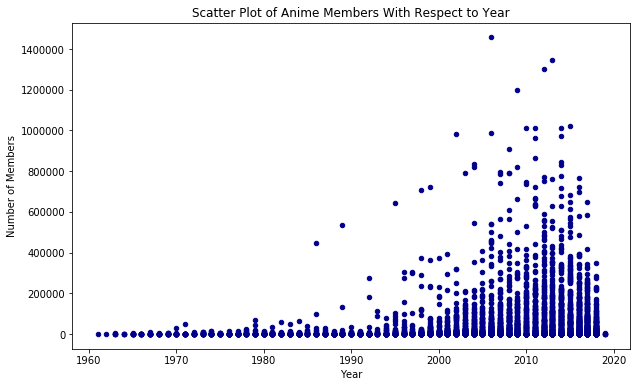

In [17]:
df_year = df_filtered[df_filtered.year != 0]

df_year.plot(kind='scatter', x='year', y='members', figsize=(10, 6), color='darkblue')

plt.title('Scatter Plot of Anime Members With Respect to Year')
plt.xlabel('Year')
plt.ylabel('Number of Members')

plt.show()

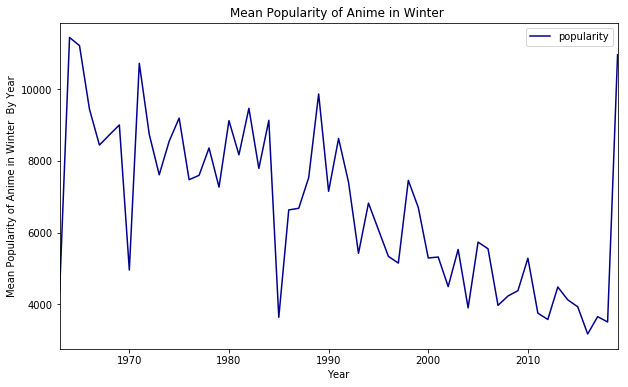

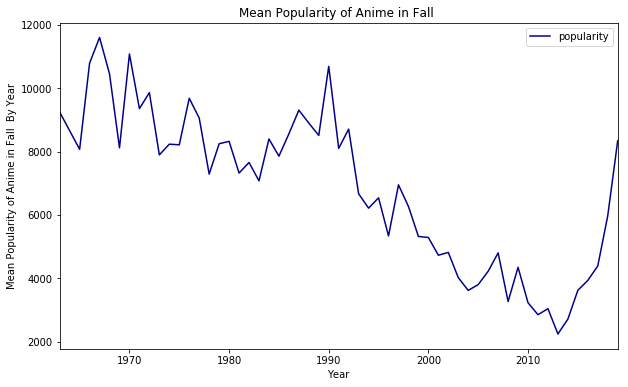

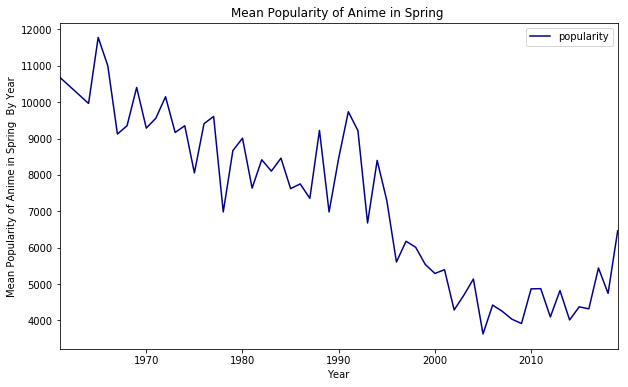

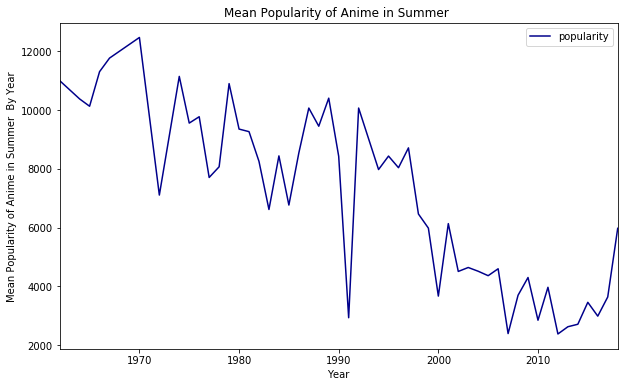

In [11]:
seasons = ["Winter ", "Fall ", "Spring ", "Summer "]
for season in seasons:
    df_season = df_filtered[df_filtered.season == season]
    df_year2 = df_season.groupby("year").mean()
    df_year2.plot(kind='line', y = "popularity", figsize=(10, 6), color='darkblue')

    plt.title('Mean Popularity of Anime in ' + season)
    plt.xlabel('Year')
    plt.ylabel('Mean Popularity of Anime in ' + season + " By Year")

    plt.show()

In [22]:
wordcloud_genre = df_filtered.genre.value_counts()
print (wordcloud_genre)

Hentai                                                                               868
Comedy                                                                               590
Music                                                                                533
Kids                                                                                 285
Slice of Life                                                                        166
Dementia                                                                             157
Fantasy                                                                              139
Drama                                                                                129
Slice of Life, Comedy                                                                121
Comedy, Kids                                                                         116
Comedy, Slice of Life                                                                110
Music, Kids          

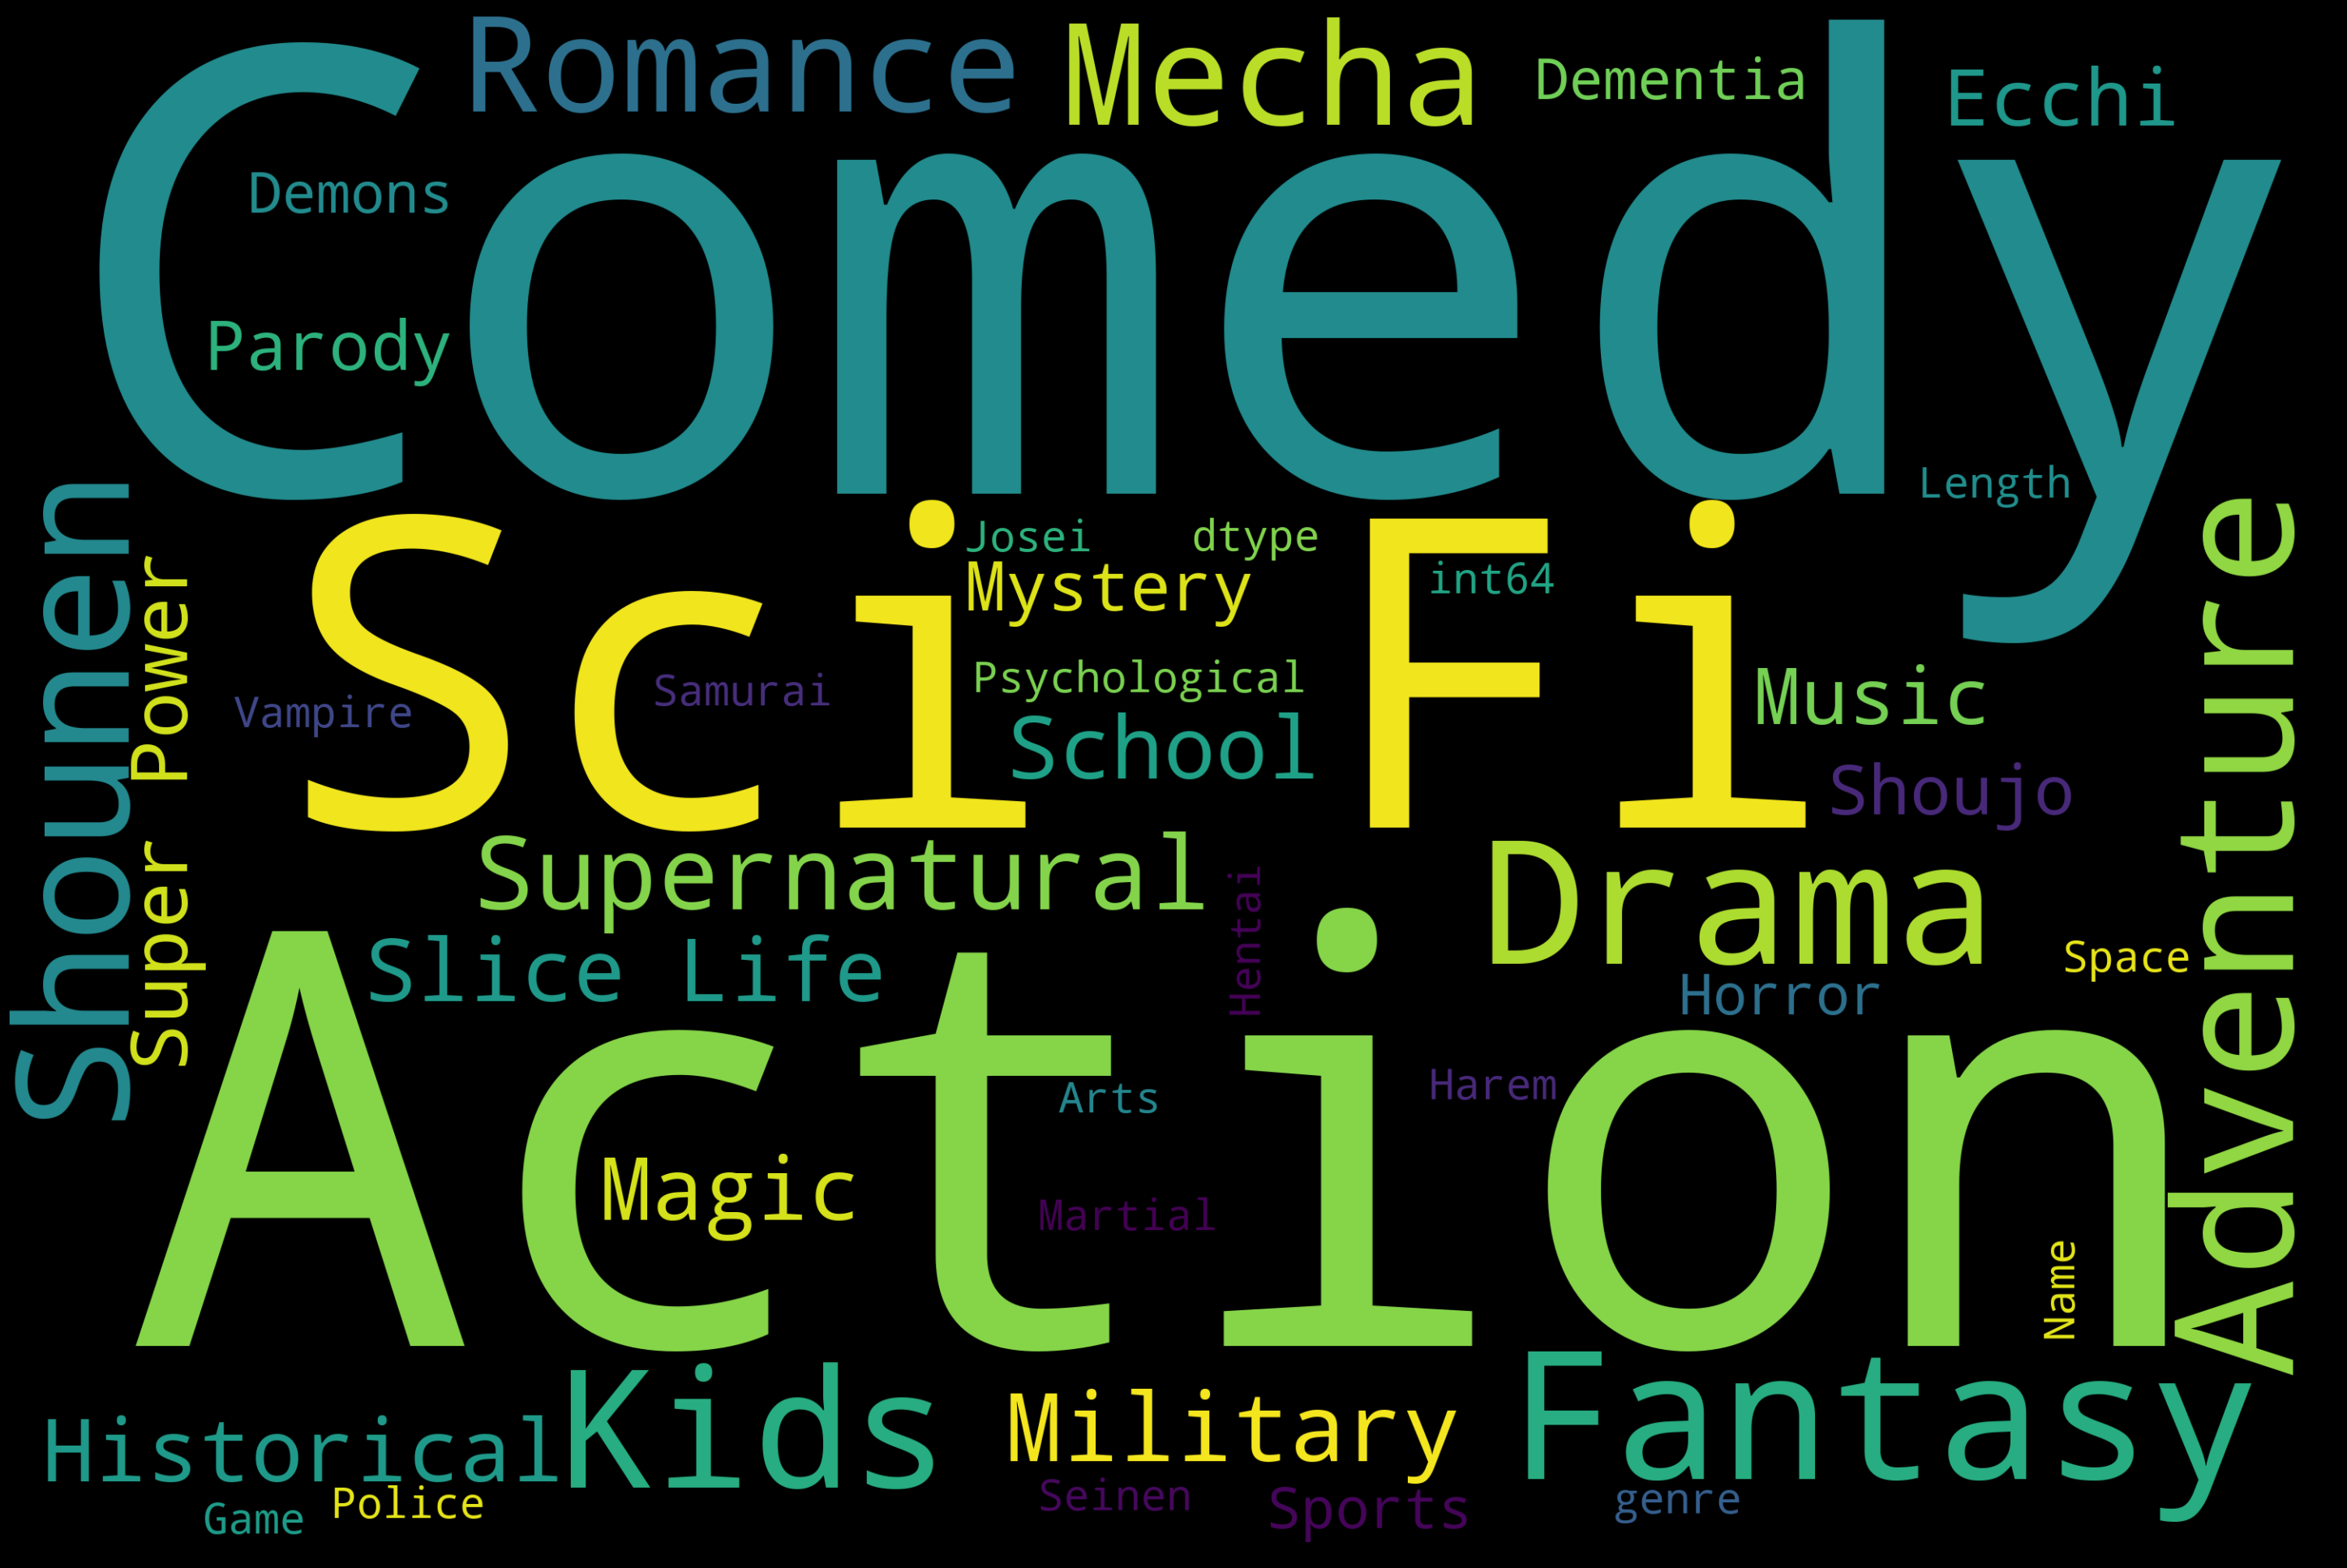

In [24]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = wordcloud_genre
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()